In [90]:
import numpy as np
from matplotlib import pyplot as plt
import time
import scipy.optimize as opt
rng = np.random.default_rng(1690)

In [135]:
def real_sir(X0,mu,beta,gamma,tmax): #define a SIR Model with births and deaths. There are 6 possible events here: birth; S death; I death; R death; infection; recovery
    """
    :param X0: Initial Conditions for reality
    :param mu: Birth/death rate
    :param beta: Infection rate
    :param gamma: Recovery rate
    :param tmax: length of simulation
    :return: X(tmax), times
    """

    #initilise the required arrays
    times = np.array([0.0])
    t = 0.0
    X = np.array(X0)
    sol = np.array([X0])
    # Run
    while((t<tmax) & (X[1]>0)):
        N = sum(X)
        Rt = (beta*X[0]*X[1]/N)
        Rr = gamma*X[1]
        Rds = (mu*X[0])
        Rdi = (mu*X[1])
        Rdr = (mu*X[2])
        Rb = (mu*N)
        Rtotal = Rt + Rr + Rds + Rdr + Rdi + Rb
        u = rng.exponential(1/Rtotal)
        t= t+ u
        times = np.append(times,t)

        # chose the event

        z = rng.random()
        P = z*Rtotal
        fil = np.array([Rt,Rt+Rr,Rt+Rr+Rds,Rt+Rr+Rds+Rdi,Rt+Rr+Rds+Rdi+Rdr,Rt+Rr+Rds+Rdi+Rdr+Rb])
        event = min(i for i in fil if i >= P)
        if event == fil[0]:
            X = X + [-1,1,0]

        elif event == fil[1]:
            X = X + [0,-1,1]
        elif event == fil[2]:
            X = X + [-1,0,0]
        elif event == fil[3]:
            X = X + [0,-1,0]
        elif event == fil[4]:
            X = X + [0,0,-1]
        else:
            X = X + [1,0,0]
        sol = np.append(sol,[X],axis=0)
    return sol,times

In [129]:
X0 = [9000,1000,0]
beta = 2
gamma = 1
mu = 0
tmax = 100
start_time = time.time()
real_sim_4,real_times_4 = real_sir(X0, mu, beta, gamma, tmax)
time_4 = time.time() - start_time
print(f"{time_4} seconds")
print(real_sim_4)
print(real_sim_4[-1][-1])

0.46830153465270996 seconds
[[9000 1000    0]
 [8999 1001    0]
 [8998 1002    0]
 ...
 [1808    2 8190]
 [1808    1 8191]
 [1808    0 8192]]
8192


In [8]:
X0 = [900,100,0]
beta = 1
gamma = 0.5
mu = 0
tmax = 100
start_time = time.time()
real_sim_3,real_times_3 = real_sir(X0, mu, beta, gamma, tmax)
time_3 = time.time() - start_time
print(f"{time_3} seconds")

0.04325270652770996 seconds


In [9]:
X0 = [90,10,0]
beta = 1
gamma = 0.5
mu = 0
tmax = 100
start_time = time.time()
real_sim_2,real_times_2 = real_sir(X0, mu, beta, gamma, tmax)
time_2 = time.time() - start_time
print(f"{time_2} seconds")

0.0048825740814208984 seconds


In [10]:
X0 = [9,1,0]
beta = 1
gamma = 0.5
mu = 0
tmax = 100
start_time = time.time()
real_sim_1,real_times_1 = real_sir(X0, mu, beta, gamma, tmax)
time_1 = time.time() - start_time
print(f"{time_1} seconds")

0.0 seconds


In [11]:
X0 = [1800,200,0]
beta = 1
gamma = 0.5
mu = 0
tmax = 100
start_time = time.time()
real_sim_3_2,real_times_3_2 = real_sir(X0, mu, beta, gamma, tmax)
time_3_2 = time.time() - start_time
print(f"{time_3_2} seconds")

0.0861515998840332 seconds


In [23]:
X0 = [3600,400,0]
beta = 1
gamma = 0.5
mu = 0
tmax = 100
start_time = time.time()
real_sim_3_4,real_times_3_4 = real_sir(X0, mu, beta, gamma, tmax)
time_3_4 = time.time() - start_time
print(f"{time_3_4} seconds")
print(real_sim_3_4)

0.1775047779083252 seconds
[[3600  400    0]
 [3599  401    0]
 [3599  400    1]
 ...
 [ 678    2 3320]
 [ 678    1 3321]
 [ 678    0 3322]]


In [13]:
X0 = [7200,800,0]
beta = 1
gamma = 0.5
mu = 0
tmax = 100
start_time = time.time()
real_sim_3_8,real_times_3_8 = real_sir(X0, mu, beta, gamma, tmax)
time_3_8 = time.time() - start_time
print(f"{time_3_8} seconds")

0.37546825408935547 seconds


In [14]:
X0 = [5400,600,0]
beta = 1
gamma = 0.5
mu = 0
tmax = 100
start_time = time.time()
real_sim_3_6,real_times_3_6 = real_sir(X0, mu, beta, gamma, tmax)
time_3_6 = time.time() - start_time
print(f"{time_3_6} seconds")

0.2683892250061035 seconds


C:\Users\ollie\AppData\Local\Temp\ipykernel_27088\94243460.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


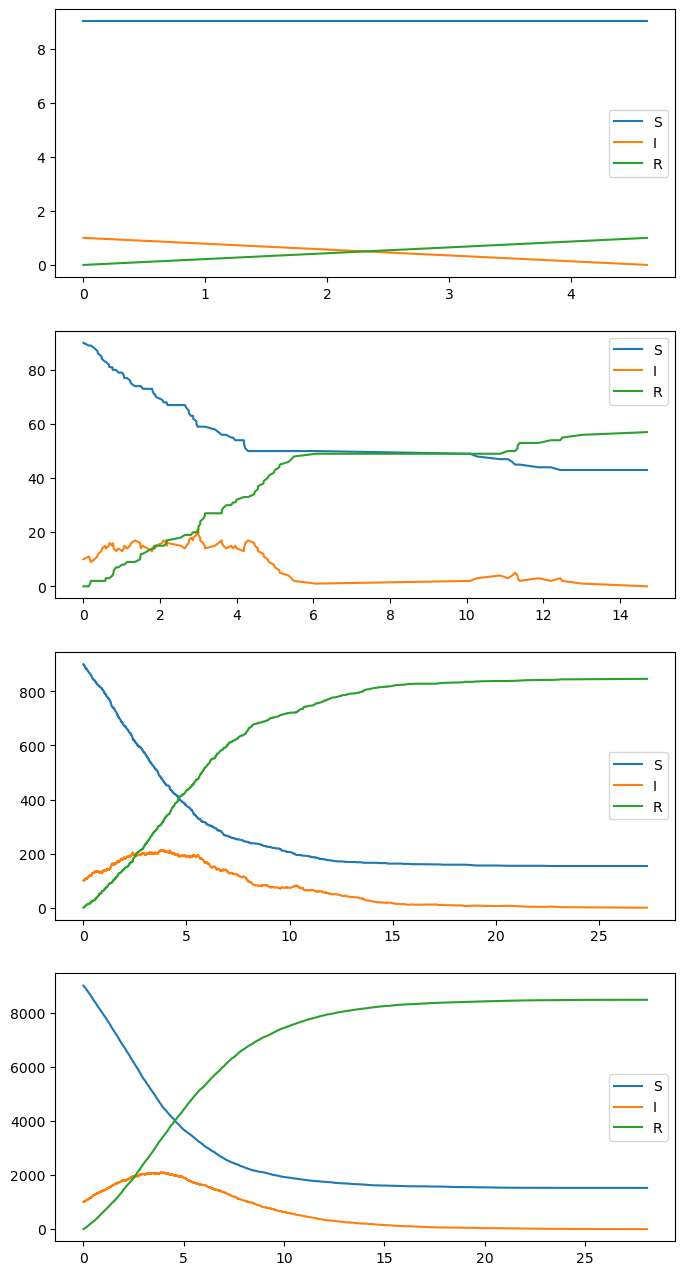

In [15]:
fig, ax0 = plt.subplots(figsize = (8,16), nrows=4)
ax0[0].plot(real_times_1,real_sim_1, label = ["S","I","R"])
ax0[1].plot(real_times_2,real_sim_2, label = ["S","I","R"])
ax0[2].plot(real_times_3,real_sim_3, label = ["S","I","R"])
ax0[3].plot(real_times_4,real_sim_4, label = ["S","I","R"])
ax0[0].legend()
ax0[1].legend()
ax0[2].legend()
ax0[3].legend()
fig.show()

<bound method Axes.plot of <Axes: >>

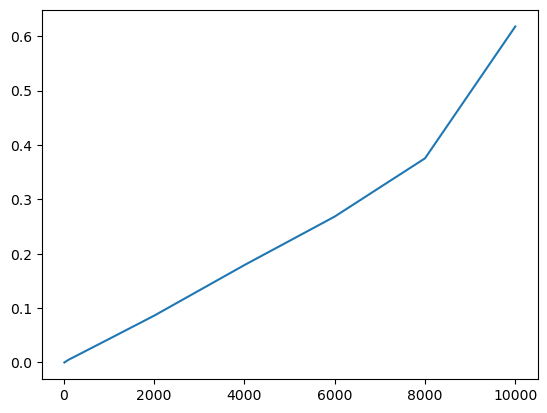

In [16]:
times = [time_1,time_2,time_3,time_3_2,time_3_4,time_3_6,time_3_8,time_4]
x_axis_times = [10,100,1000,2000,4000,6000,8000,10000]
fig, ax0 = plt.subplots()
ax0.plot(x_axis_times,times)
ax0.plot

In [130]:
def test_SIR(N,beta,gamma,mu,tmax,iterations):
    extinct = 0
    av_time = []
    final_size = []
    for i in range(iterations):
        sim, tim = real_sir([N-1,1,0],mu,beta,gamma,tmax)
        av_time.append(tim[-1])

        if av_time[-1] <= 5*1/gamma:
            extinct +=1
        else:
            final_size.append(sim[-1][-1])
    return extinct,av_time,final_size

In [161]:
start_time = time.time()
iters = 100
beta = 2
gamma = 0.6
mu = 0
tmax = 100
N = 1000
extincts, tims, sizes = test_SIR(N,beta,gamma,mu,tmax,iters)
print(f"Time for test = {time.time() - start_time} seconds with {iters} runs")

Time for test = 3.3932838439941406 seconds with 100 runs


In [162]:
def test_func(x):
        return  abs(x - 1 + ((N-1)/N)*np.exp(-(beta/gamma)*x))
w = opt.minimize(test_func,1)
print(w.x[0])

0.9591650643708826


In [163]:
print(extincts)
print(1/(beta/gamma) * iters)
print(np.mean(tims))
print(np.mean(sizes)/N)
#print(tims)

35
30.0
12.560788033235529
0.9589384615384615


(array([ 2.,  2.,  5.,  4.,  4., 14.,  3.,  3.,  3.,  1.]),
 array([7758. , 7797.6, 7837.2, 7876.8, 7916.4, 7956. , 7995.6, 8035.2,
        8074.8, 8114.4, 8154. ]),
 <BarContainer object of 10 artists>)

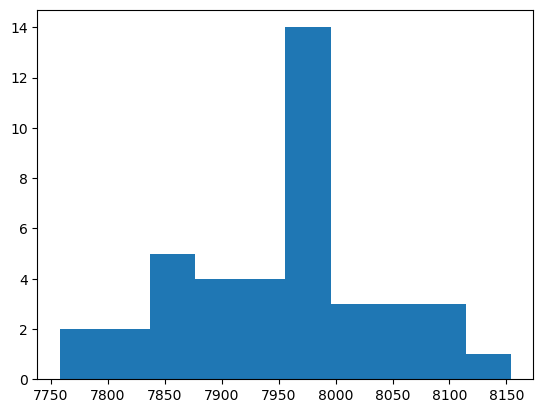

In [156]:
plt.hist(sizes)